In [15]:
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.tree as tree
import matplotlib.pyplot as plt

In [16]:
df_teams=pd.read_csv('data/teams_processed.csv')

df_teams = df_teams[df_teams['year'] != 1]
df_teams.drop(columns=['tmID'], inplace=True)
df_teams.head()


,year,rank,playoff,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,...,total_first_round_won,total_first_round_lost,total_semis_won,total_semis_lost,total_finals_won,total_finals_lost,mean_won,mean_lost,confID_EA,confID_WE
16,2,8.0,1,812.0,1903.0,431.0,577.0,131.0,386.0,305.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,24.0,1.0,0.0
17,2,2.0,1,809.0,1828.0,426.0,570.0,141.0,407.0,331.0,...,1.0,0.0,0.0,1.0,0.0,0.0,17.0,15.0,1.0,0.0
18,2,5.0,0,868.0,1980.0,519.0,699.0,76.0,273.0,341.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,18.0,1.0,0.0
19,2,2.0,1,891.0,1894.0,521.0,634.0,172.0,491.0,273.0,...,1.0,0.0,1.0,0.0,1.0,0.0,27.0,5.0,0.0,1.0
20,2,7.0,0,796.0,1838.0,428.0,569.0,193.0,521.0,285.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,23.0,1.0,0.0


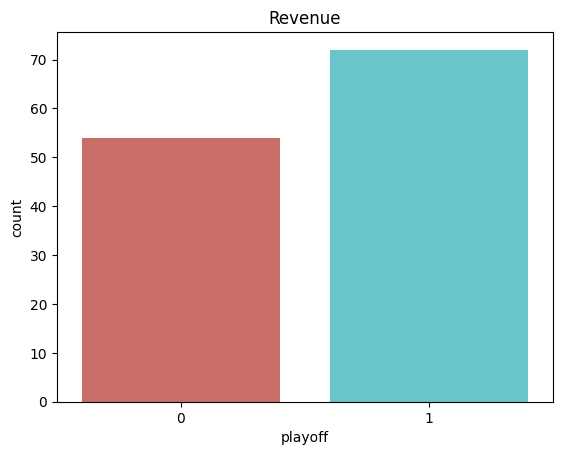

In [17]:
sb.countplot(x='playoff',data=df_teams, palette='hls')
plt.title("Revenue")
plt.show()

In [18]:

def train_evaluate_decision_tree_graph(model, data, target_col="playoff", scaling=False):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    years_tested = []

    # Sort the data by the "year" column
    data = data.sort_values(by="year")

    years = sorted(data["year"].unique())

    for year in years[2:]:
       
        # Split the data into training and test sets
        train_data = data[data["year"] < year ]
        test_data = data[data["year"] == year ]
        if(scaling):
            scaler = MinMaxScaler()
            train_data = scaler.fit_transform(train_data)
            train_data = pd.DataFrame(train_data, columns=data.columns)
            test_data = scaler.transform(test_data)
            test_data = pd.DataFrame(test_data, columns=data.columns)

        X_train = train_data.drop([target_col], axis=1)
        y_train = train_data[target_col]
        X_test = test_data.drop([target_col], axis=1)
        y_test = test_data[target_col]
        print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

        # Create and train the decision tree model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy and precision
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        years_tested.append(year)

    return years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores


In [19]:

def train_evaluate_decision_tree(model, data, target_col="playoff", scaling=False):
    # Sort the data by the "year" column
    data = data.sort_values(by="year")
       
    # Define the training and testing split ratios
    train_ratio = 0.7
    train_data_year = int(train_ratio * len(data["year"].unique()))

    train_data = data[data["year"] < train_data_year]
    test_data = data[data["year"] >= train_data_year]
    if(scaling):
        scaler = MinMaxScaler()
        train_data = scaler.fit_transform(train_data)
        train_data = pd.DataFrame(train_data, columns=data.columns)
        test_data = scaler.transform(test_data)
        test_data = pd.DataFrame(test_data, columns=data.columns)

    X_train = train_data.drop(target_col, axis=1)
    y_train = train_data[target_col]
    X_test = test_data.drop(target_col, axis=1)
    y_test = test_data[target_col]

    # Create and train the decision tree model
    model.fit(X_train, y_train)
    feature_names = X_train.columns

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [20]:
def plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores):
    # Create a graph to plot accuracy, precision, recall, and f1 over time
    plt.figure(figsize=(20, 5))

    # Plot accuracy
    plt.subplot(1, 4, 1)
    plt.plot(years_tested, accuracy_scores, marker='o')
    plt.title('Accuracy Over Time')
    plt.xlabel('Test Year')
    plt.ylabel('Accuracy')

    # Plot precision
    plt.subplot(1, 4, 2)
    plt.plot(years_tested, precision_scores, marker='o', color='orange')
    plt.title('Precision Over Time')
    plt.xlabel('Test Year')
    plt.ylabel('Precision')

    # Plot recall
    plt.subplot(1, 4, 3)
    plt.plot(years_tested, recall_scores, marker='o', color='green')
    plt.title('Recall Over Time')
    plt.xlabel('Test Year')
    plt.ylabel('Recall')

    # Plot f1
    plt.subplot(1, 4, 4)
    plt.plot(years_tested, f1_scores, marker='o', color='red')
    plt.title('F1 Over Time')
    plt.xlabel('Test Year')
    plt.ylabel('F1')

    plt.tight_layout()
    plt.show()



(32, 52) (32,) (14, 52) (14,)
(46, 52) (46,) (13, 52) (13,)
(59, 52) (59,) (13, 52) (13,)
(72, 52) (72,) (14, 52) (14,)
(86, 52) (86,) (13, 52) (13,)
(99, 52) (99,) (14, 52) (14,)
(113, 52) (113,) (13, 52) (13,)
Accuracy: 0.6417910447761194
Precision: 0.6333333333333333
Recall: 0.95
F1: 0.7599999999999999


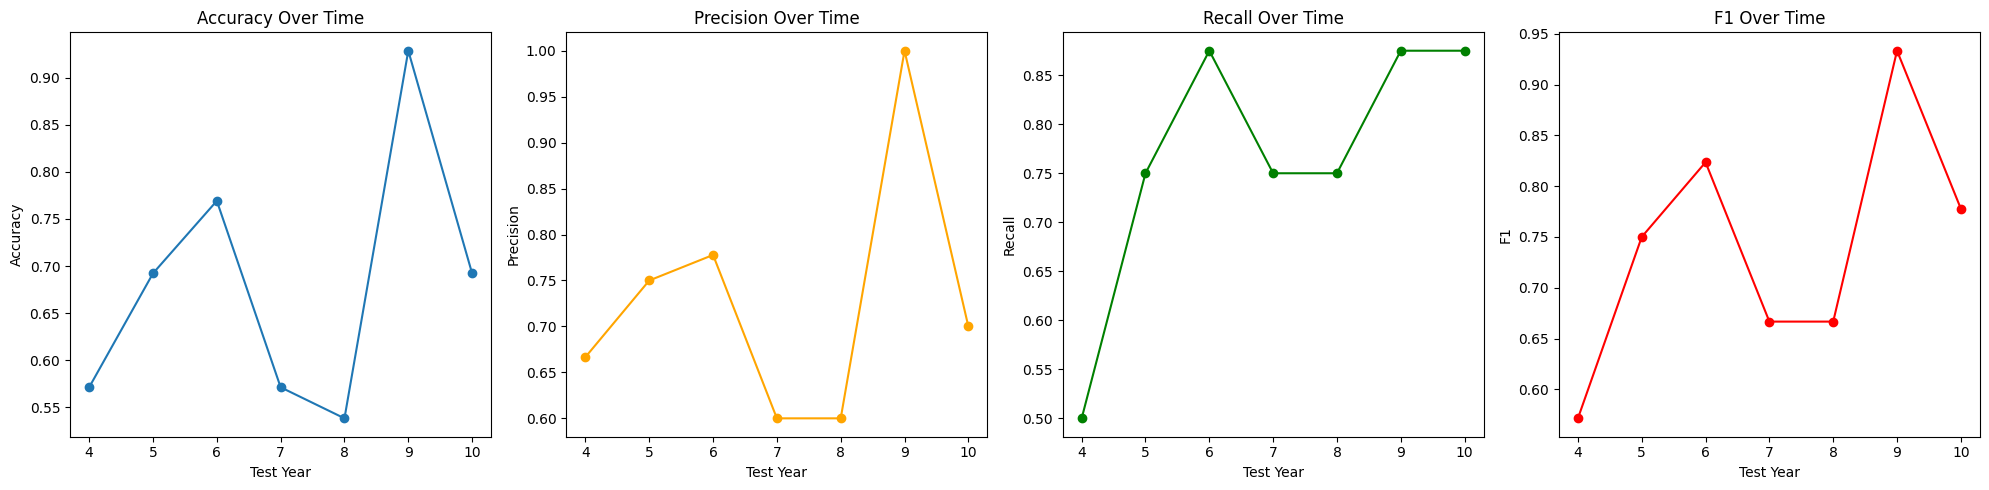

In [21]:
model = DecisionTreeClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 52) (32,) (14, 52) (14,)
(46, 52) (46,) (13, 52) (13,)
(59, 52) (59,) (13, 52) (13,)
(72, 52) (72,) (14, 52) (14,)
(86, 52) (86,) (13, 52) (13,)
(99, 52) (99,) (14, 52) (14,)
(113, 52) (113,) (13, 52) (13,)
Accuracy: 0.6567164179104478
Precision: 0.639344262295082
Recall: 0.975
F1: 0.7722772277227722


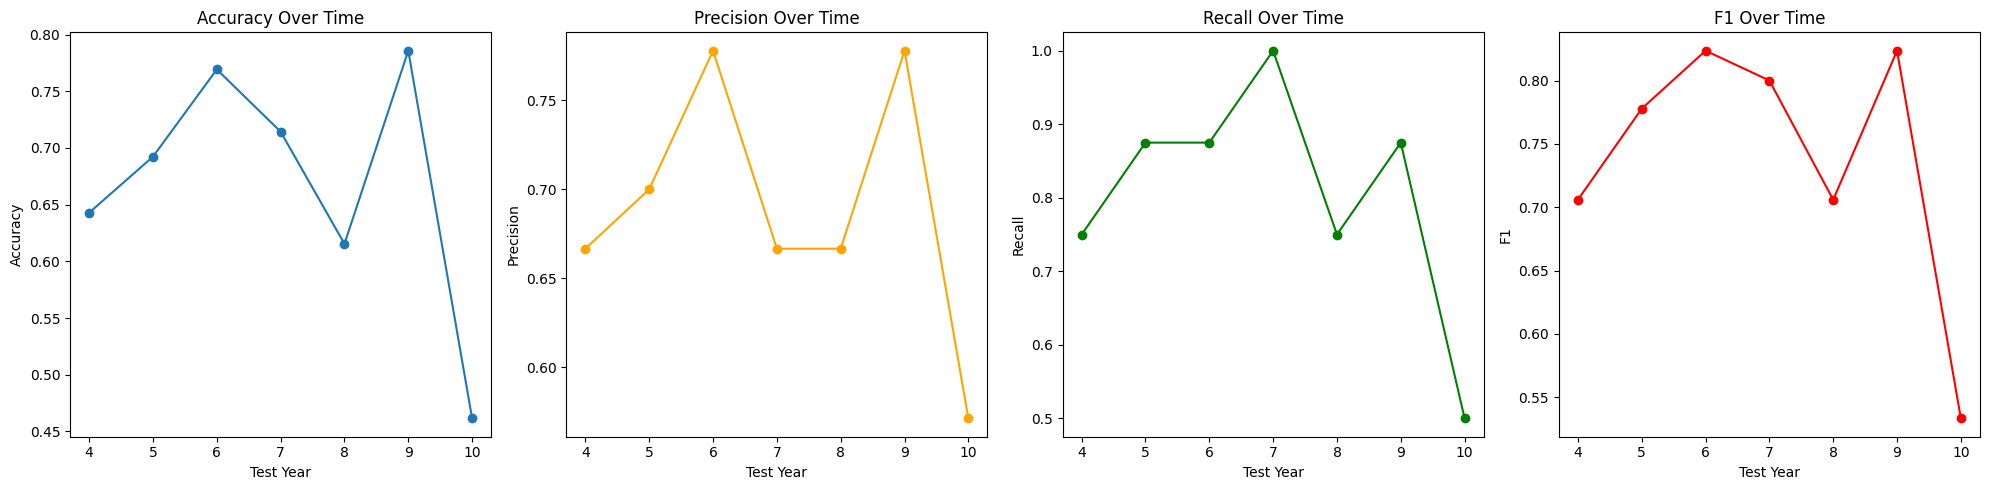

In [22]:
model = RandomForestClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 52) (32,) (14, 52) (14,)
(46, 52) (46,) (13, 52) (13,)
(59, 52) (59,) (13, 52) (13,)
(72, 52) (72,) (14, 52) (14,)
(86, 52) (86,) (13, 52) (13,)
(99, 52) (99,) (14, 52) (14,)
(113, 52) (113,) (13, 52) (13,)
Accuracy: 0.6119402985074627
Precision: 0.6458333333333334
Recall: 0.775
F1: 0.7045454545454546


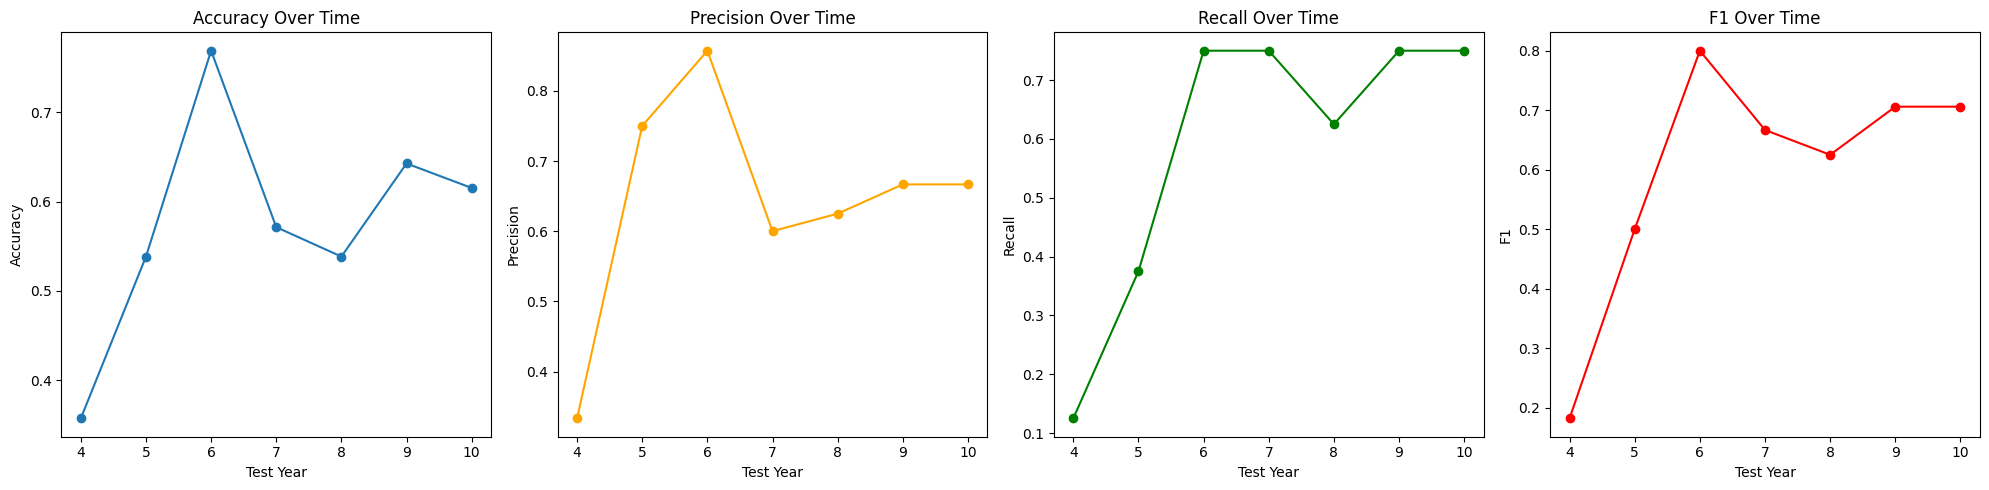

In [23]:
model = KNeighborsClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams, scaling=True)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams, scaling=True)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 52) (32,) (14, 52) (14,)
(46, 52) (46,) (13, 52) (13,)
(59, 52) (59,) (13, 52) (13,)
(72, 52) (72,) (14, 52) (14,)
(86, 52) (86,) (13, 52) (13,)
(99, 52) (99,) (14, 52) (14,)
(113, 52) (113,) (13, 52) (13,)
Accuracy: 0.6268656716417911
Precision: 0.6363636363636364
Recall: 0.875
F1: 0.7368421052631579


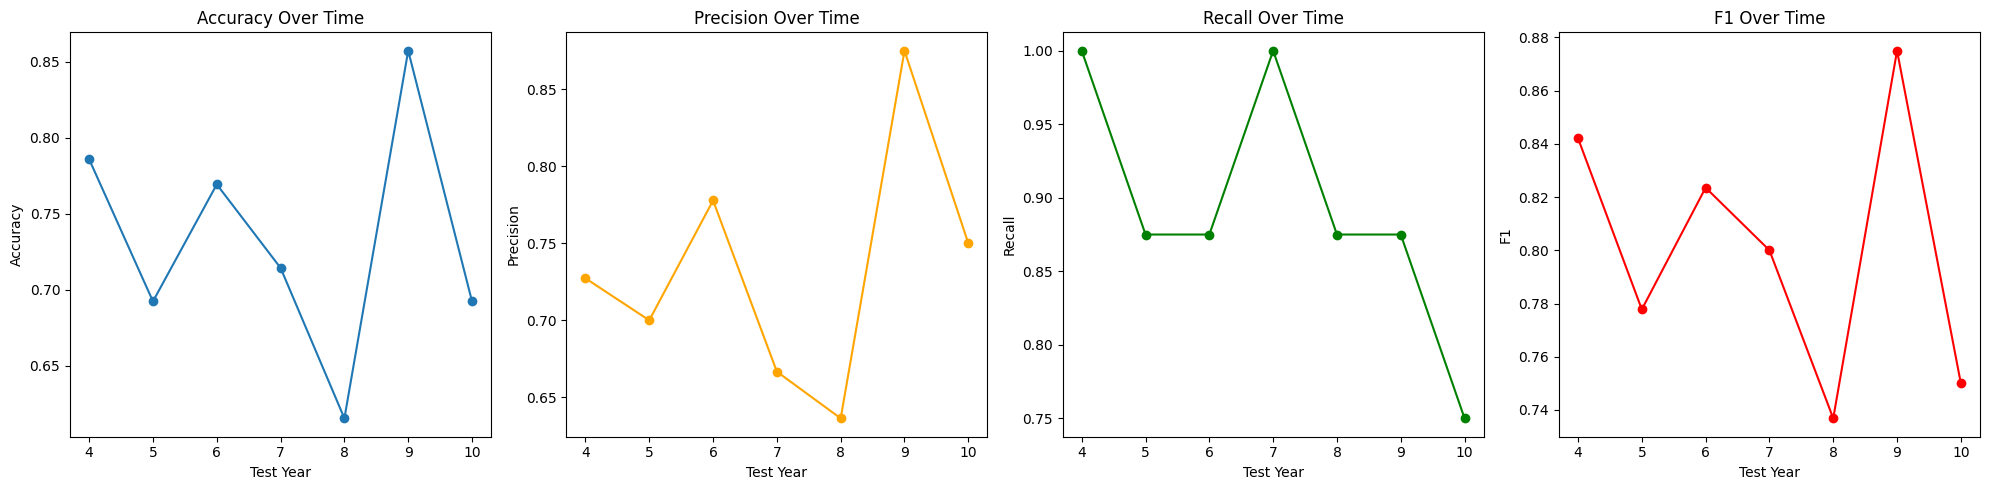

In [24]:
model = XGBClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)


(32, 52) (32,) (14, 52) (14,)
(46, 52) (46,) (13, 52) (13,)
(59, 52) (59,) (13, 52) (13,)
(72, 52) (72,) (14, 52) (14,)
(86, 52) (86,) (13, 52) (13,)
(99, 52) (99,) (14, 52) (14,)
(113, 52) (113,) (13, 52) (13,)
Accuracy: 0.6716417910447762
Precision: 0.6875
Recall: 0.825
F1: 0.75


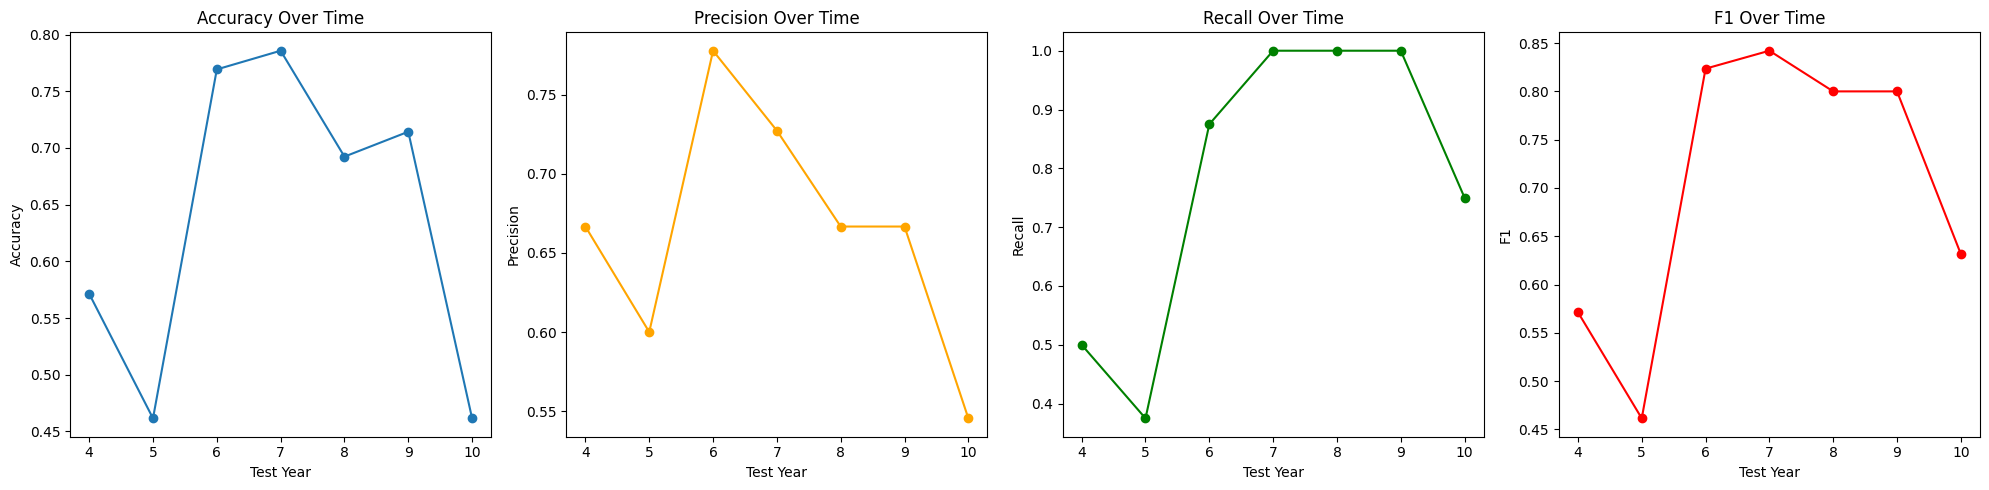

In [25]:
model = GaussianNB()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 52) (32,) (14, 52) (14,)
(46, 52) (46,) (13, 52) (13,)
(59, 52) (59,) (13, 52) (13,)
(72, 52) (72,) (14, 52) (14,)
(86, 52) (86,) (13, 52) (13,)
(99, 52) (99,) (14, 52) (14,)
(113, 52) (113,) (13, 52) (13,)
Accuracy: 0.6119402985074627
Precision: 0.6206896551724138
Recall: 0.9
F1: 0.7346938775510204


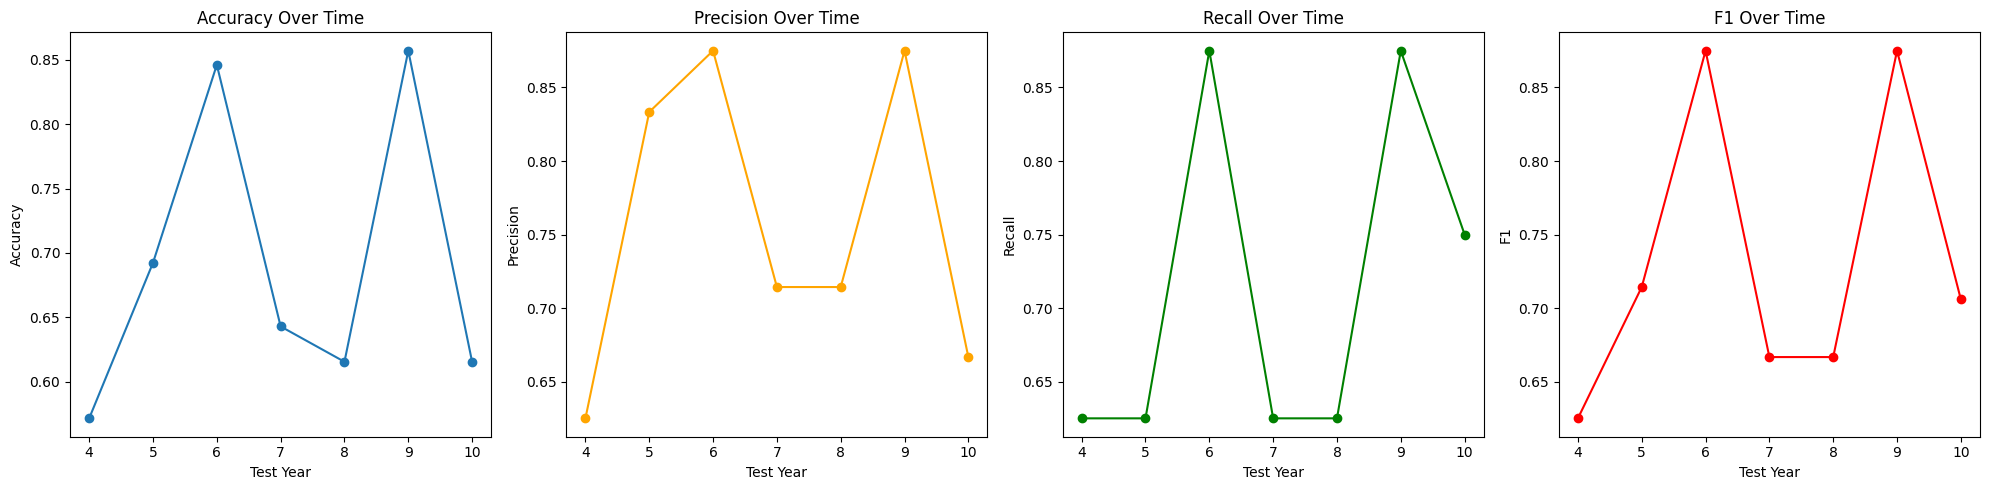

In [26]:
model =SVC()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams, scaling=True)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams, scaling=True)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 52) (32,) (14, 52) (14,)
(46, 52) (46,) (13, 52) (13,)
(59, 52) (59,) (13, 52) (13,)
(72, 52) (72,) (14, 52) (14,)
(86, 52) (86,) (13, 52) (13,)
(99, 52) (99,) (14, 52) (14,)
(113, 52) (113,) (13, 52) (13,)
Accuracy: 0.6417910447761194
Precision: 0.6379310344827587
Recall: 0.925
F1: 0.7551020408163266


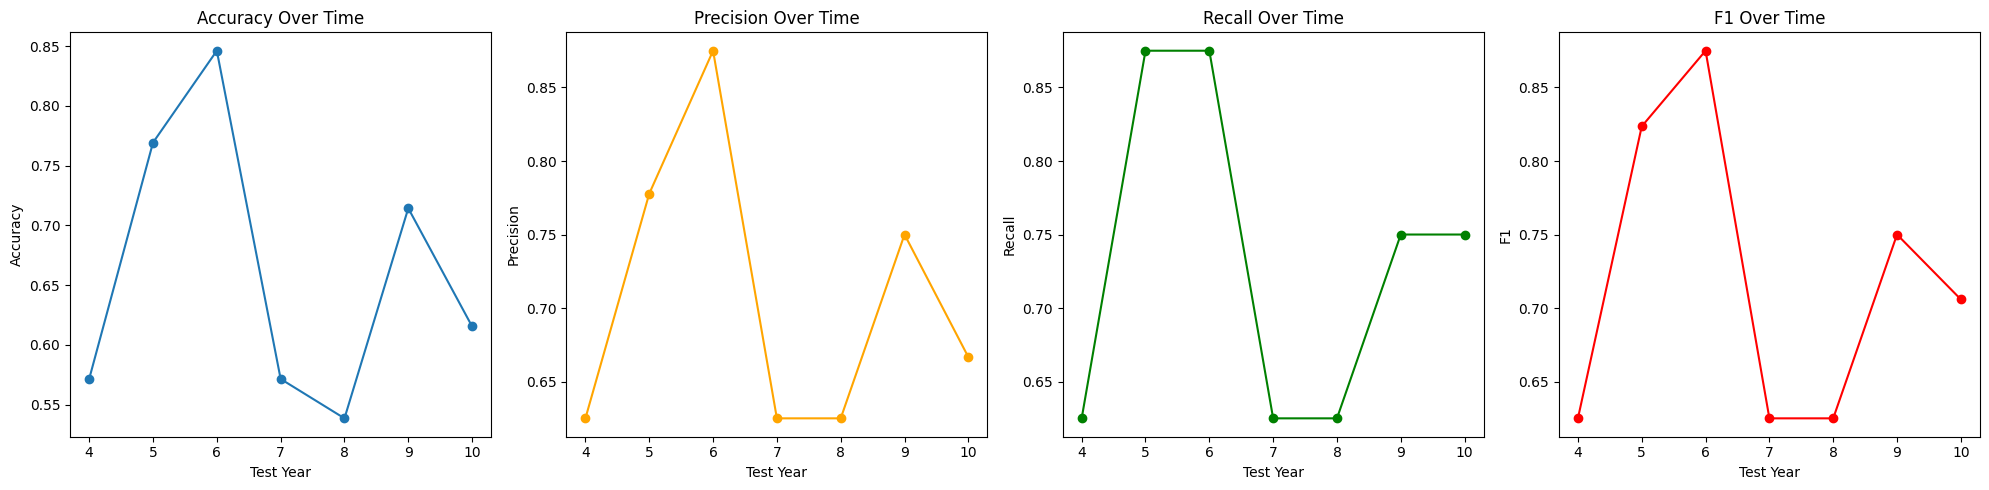

In [27]:
model = LogisticRegression()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams, scaling=True)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams, scaling=True)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)

(32, 52) (32,) (14, 52) (14,)
(46, 52) (46,) (13, 52) (13,)
(59, 52) (59,) (13, 52) (13,)


C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jigs2\A

(72, 52) (72,) (14, 52) (14,)
(86, 52) (86,) (13, 52) (13,)


C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(99, 52) (99,) (14, 52) (14,)
(113, 52) (113,) (13, 52) (13,)


C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jigs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.6268656716417911
Precision: 0.6363636363636364
Recall: 0.875
F1: 0.7368421052631579


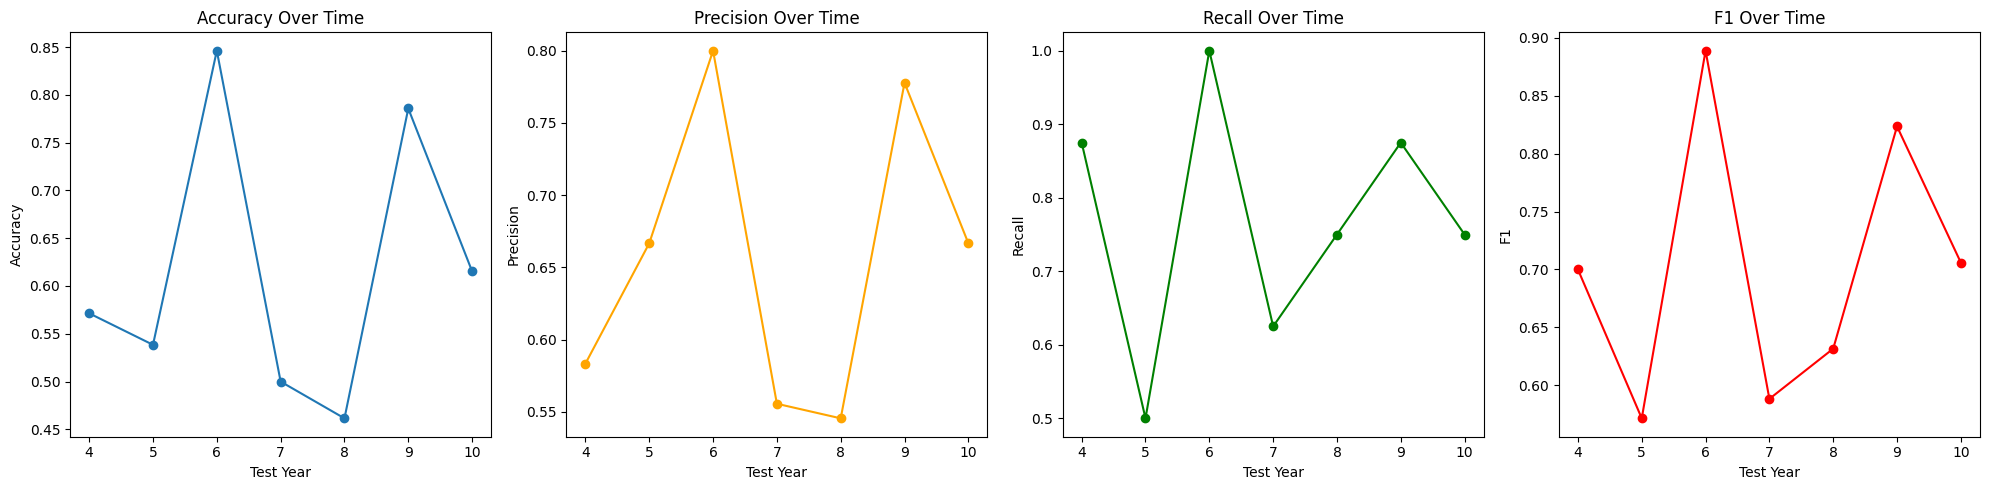

In [28]:
model = MLPClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams, scaling=True)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams, scaling=True)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
plot_metrics_over_time(years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores)